<a href="https://colab.research.google.com/github/Nobel712/Deep-learning-project/blob/main/Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,models

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
trandata=os.path.join("/content/drive/MyDrive/Deep Db/flowers")

In [6]:
classdata=os.listdir(trandata)

In [7]:
classdata

['tulip', 'daisy', 'rose', 'dandelion', 'sunflower']

In [8]:
c=0
for i in classdata:
  c+=len(os.listdir(trandata+"/"+i))

In [7]:
c

4317

In [9]:
dataGen=ImageDataGenerator(rescale=1./255,
                           horizontal_flip=True,
                           rotation_range=0.2,
                           width_shift_range=0.2,
                           height_shift_range=0.2)

In [10]:
data=dataGen.flow_from_directory(trandata,
                                            target_size=(150,150),
                                            batch_size=64,
                                            class_mode="categorical",
                                            classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
                                            shuffle=True
                                            )

Found 4317 images belonging to 5 classes.


In [11]:
x,y=next(data)

In [12]:
x.shape

(64, 150, 150, 3)

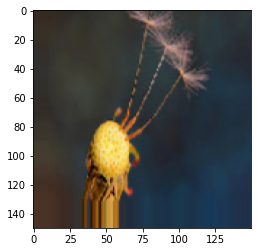

In [13]:
plt.imshow(x[0])
plt.show()

In [14]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(5,activation='softmax'))


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model_data=model.fit(data,epochs=10)

Epoch 1/10
68/68 [==============================] - 680s 10s/step - loss: 1.2724 - accuracy: 0.4732
Epoch 2/10
68/68 [==============================] - 35s 513ms/step - loss: 1.0315 - accuracy: 0.5918
Epoch 3/10
68/68 [==============================] - 36s 525ms/step - loss: 0.9351 - accuracy: 0.6319
Epoch 4/10
68/68 [==============================] - 35s 514ms/step - loss: 0.8853 - accuracy: 0.6537
Epoch 5/10
68/68 [==============================] - 35s 511ms/step - loss: 0.7887 - accuracy: 0.6996
Epoch 6/10
68/68 [==============================] - 36s 534ms/step - loss: 0.7727 - accuracy: 0.7081
Epoch 7/10
68/68 [==============================] - 35s 514ms/step - loss: 0.7325 - accuracy: 0.7158
Epoch 8/10
68/68 [==============================] - 35s 509ms/step - loss: 0.7116 - accuracy: 0.7308
Epoch 9/10
68/68 [==============================] - 36s 528ms/step - loss: 0.6855 - accuracy: 0.7408
Epoch 10/10
68/68 [==============================] - 35s 511ms/step - loss: 0.6649 - accurac